<a href="https://colab.research.google.com/github/roneshpra/PythonLearning/blob/Dev/PythonBasics/M2W4_Project_PersonalLoans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/18.2 MB 25.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 48.1 MB/s eta 0:00:00
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 60e7f0f7f6d0eee8364b9a6304c2845b9c491ac706048c7e8cf47b83123b8dbf
             Got        1dc9aeaa234509c93dcc9c53b0850bc5ccab8c60fb1a4bfbcac5347d7a248e3a



**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# uncomment the below lines if Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading data into a pandas dataframe
personal_loans = pd.read_csv("/content/drive/MyDrive/Loan_Modelling.csv")

In [5]:
# creating a copy of the data
data = personal_loans.copy()

## Data Overview

* Observations
* Sanity checks

#### Viewing the first and last 5 rows of the dataset

In [6]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### Checking the shape of the dataset

In [8]:
data.shape

(5000, 14)

#### Observations:

*   The dataset has 5000 rows and 14 columns



#### Checking the attribute types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observations:

*   All columns in the data set are numerical
*   13 columns of of type integers and 1 column is of type float



#### Checking the statistical summary

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observations:


*   The average age of the customers is ~45 years
*   On an average, the customers have ~20 years of professional experience
*   Customers earn on an average ~74k dollars annually, with ~25% earning more than 98k
*   Customers on an average have ~56k dollars of mortgage
*   There are negative values for Experience which need to treated for further analysis



#### Checking for duplicate values

In [11]:
data.duplicated().sum()

np.int64(0)

#### Observations:


*   There are no duplicate values in the data



#### Dropping columns

In [12]:
data.ID.nunique()

5000

In [13]:
data = data.drop(columns=["ID"], axis= 1 )



#### Observations:

*   Dropping the column ID since it does not have much significance



#### Negative Values Treatment for Experience

In [14]:
# get the unique values for Experience
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [15]:
# check for negative values
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [16]:
# Replacing negative values with absolute vaues
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

#### Feature Engineering

In [17]:
# get the count of unique values for ZIPCode
data["ZIPCode"].nunique()

467

In [18]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [19]:
# change the data type of categorical features to 'category'
cols_category = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]

data[cols_category] = data[cols_category].astype("category")


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


#### Outlier Detection

In [21]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [22]:
(
    (data.select_dtypes(include=['float64', 'int64']) < lower)
    | (data.select_dtypes(include=['float64', 'int64']) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Functions

In [23]:
# function to create histogram box plots
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [25]:

# function for stacked bar plots
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [26]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Age

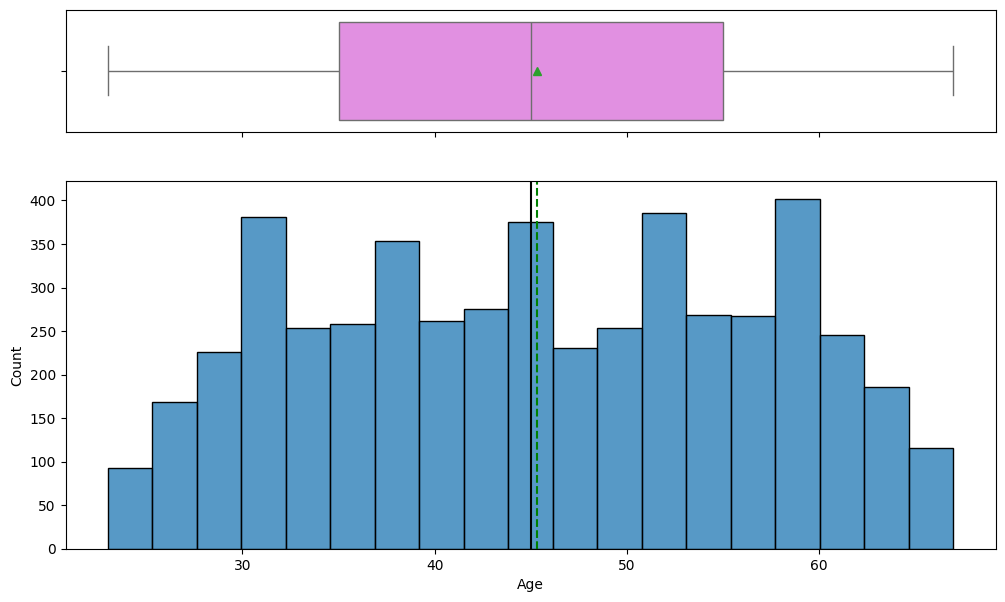

In [27]:
histogram_boxplot(data, "Age")

#### Observations:


*   The mean age is around 45 years
*   There are no outliers



#### Experience

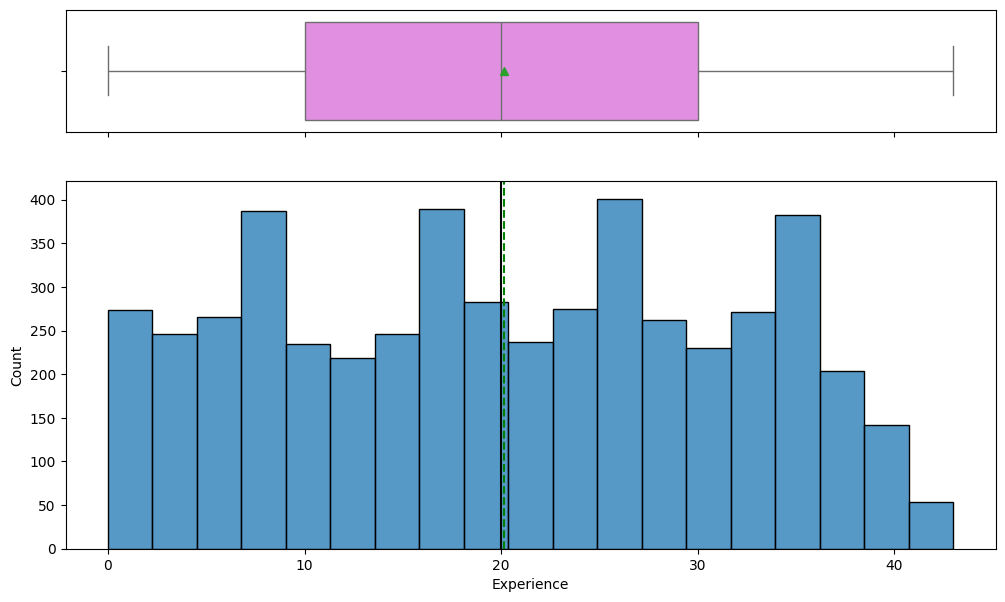

In [28]:
histogram_boxplot(data, "Experience")

#### Observations:


*   The mean experience is around 20 years with no outliers



#### Income

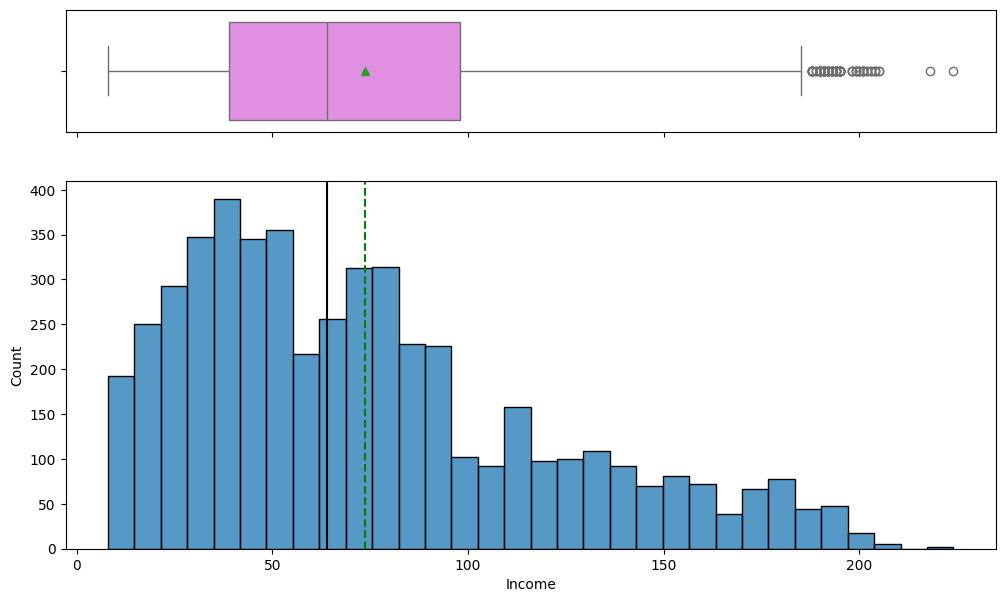

In [29]:
histogram_boxplot(data, "Income")

#### Observations:


*   Income is rightly skewed with outliers



#### Average spending on credit card

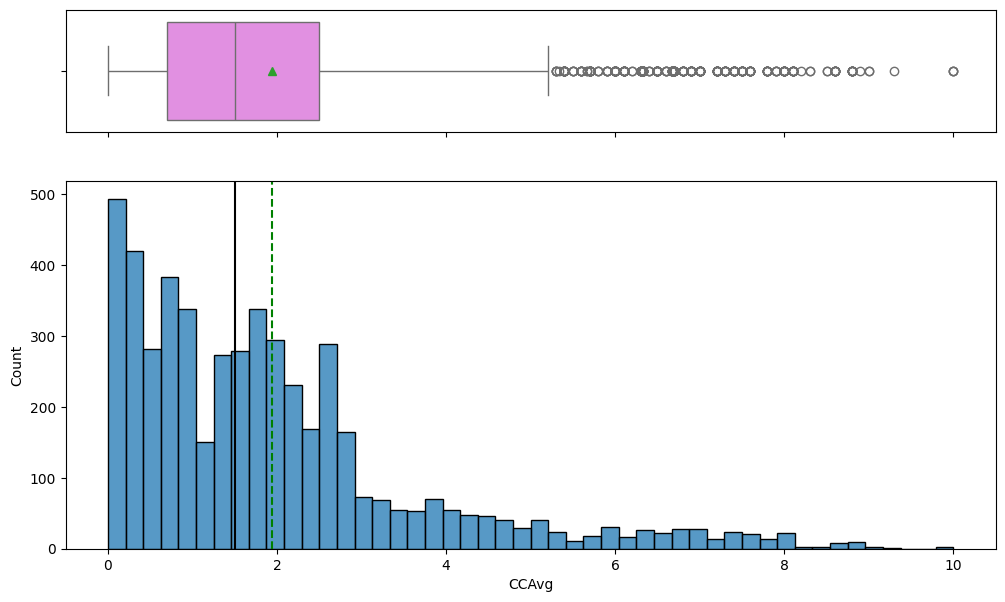

In [30]:
histogram_boxplot(data, "CCAvg")

#### Observations:


*   On an average customers spend around 2k dollars every month




#### Mortgage

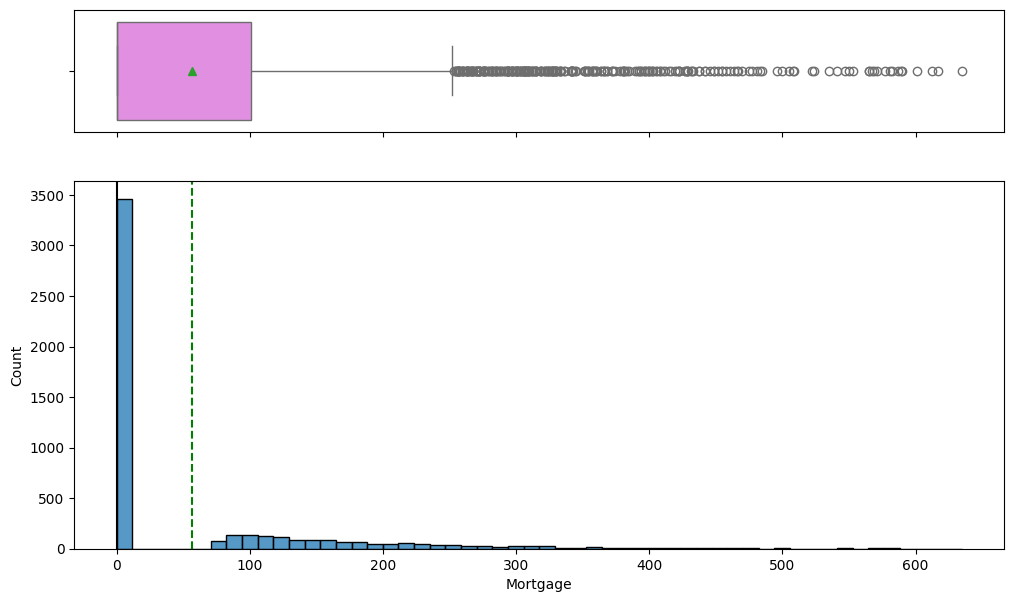

In [31]:
histogram_boxplot(data, "Mortgage")

#### Observations:


*   Mortgage is rightly skewed with outliers



#### Family

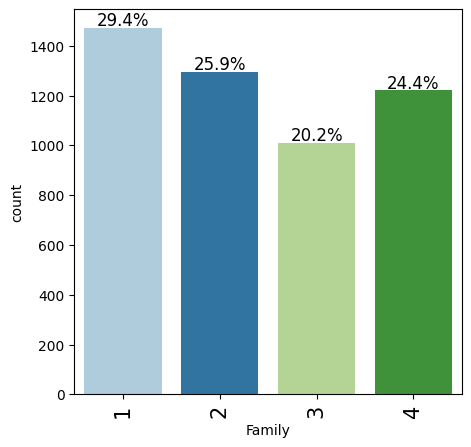

In [32]:
labeled_barplot(data, "Family", perc = True)

#### Observations:


*   Around 30% customers have the family size of 1, 26% of family size 2, 20% of family size 3 and 25% of family size 4



#### Education

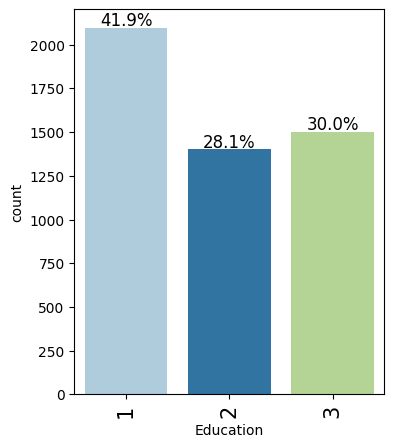

In [33]:
labeled_barplot(data, "Education", perc = True)

#### Observations:


*   Around 42% customers are undergrads, 28% Graduates and 30% post graduates



#### Securities Account

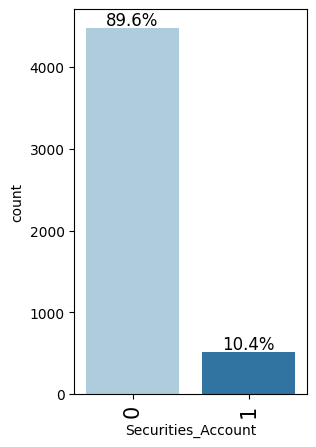

In [34]:
labeled_barplot(data, "Securities_Account", perc = True)

#### Observations:


*   89.6% customers does not have securities account with the bank



#### CD_Account

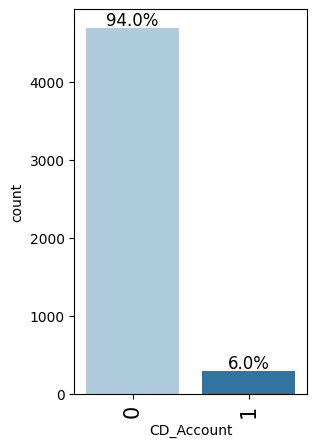

In [35]:
labeled_barplot(data, "CD_Account", perc = True)

#### Observations:


*   Only 6% customers have CD accounts with the bank



#### Online

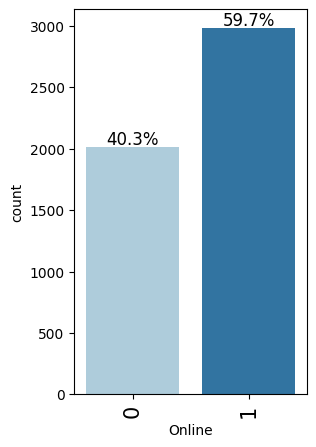

In [36]:
labeled_barplot(data, "Online", perc = True)

#### Observations:


*   Around 60% customers use internet banking



#### Credit Card

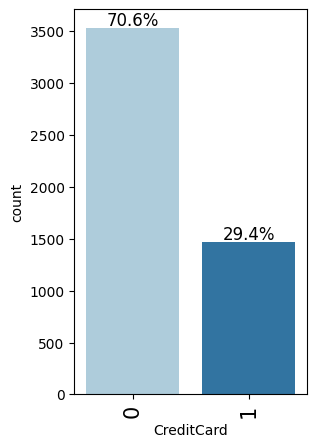

In [37]:
labeled_barplot(data, "CreditCard", perc = True)

#### Observations:


*   Almost 71% of the customers do not have credit cards from any other banks



#### Zip Code

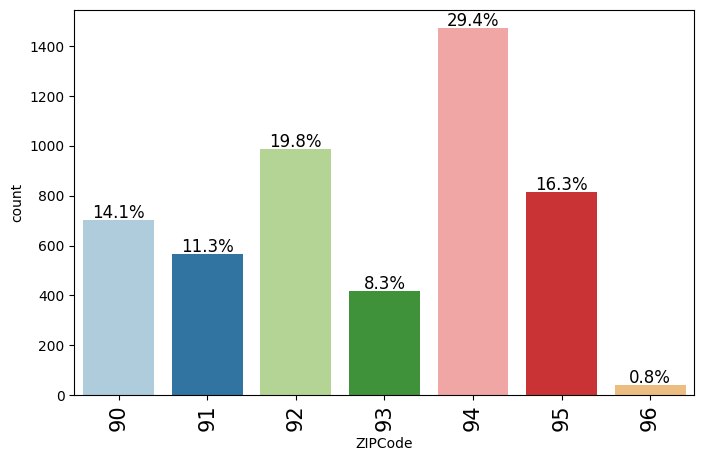

In [38]:
labeled_barplot(data, "ZIPCode", perc = True)

#### Observations:


*   Most of the customers reside in the area whose zip code starts with 94 followed by areas whose zip codes start with 92, 95, 90
*   The least number of customers are from the zip code 96



### Bivariate Analysis

#### Correlation check

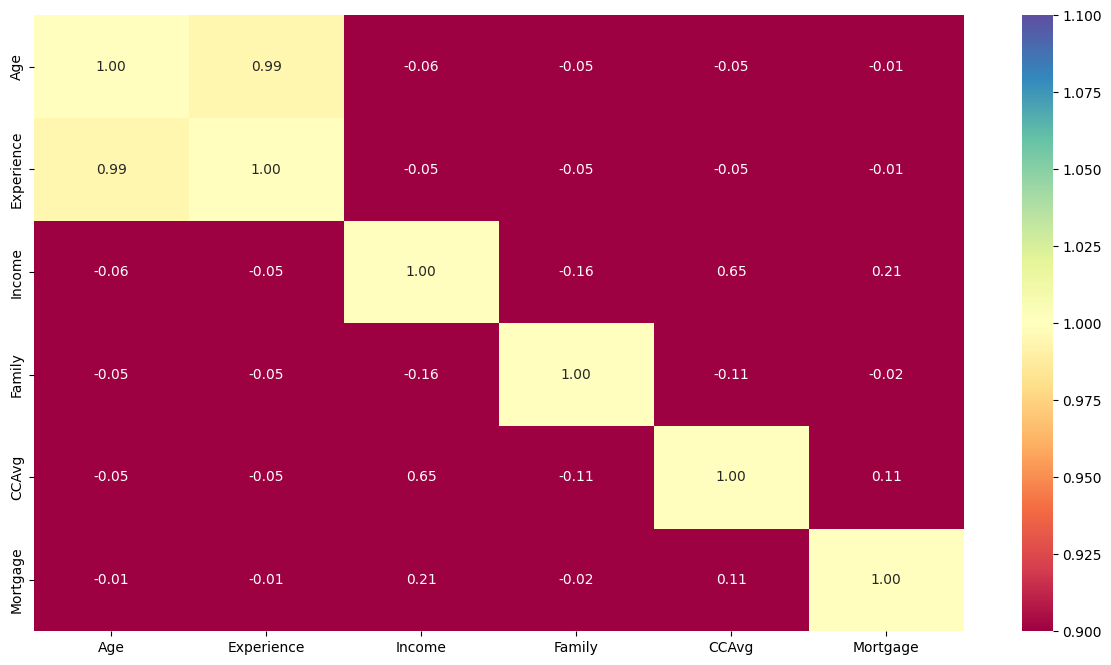

In [39]:
# get the heatmap of the data
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin = 1, vmax = 1, fmt = ".2f", cmap="Spectral")
plt.show()

#### Observations:


*   Age and Experience are highly correlated
*   There is negative correlation between Income and Family, Family and CCAvg



#### Personal Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


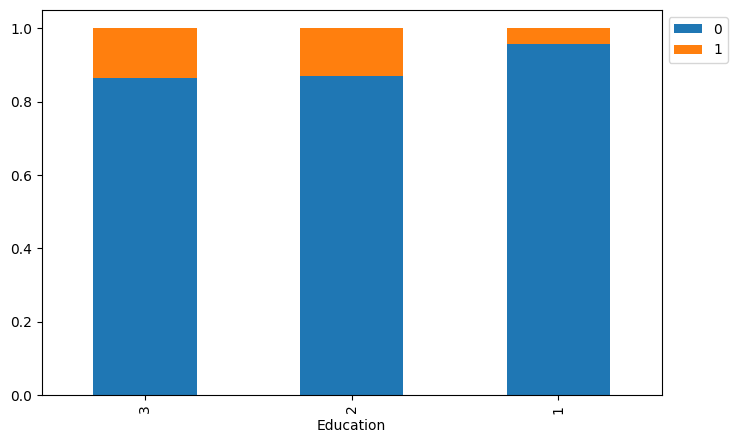

In [40]:
# stacked barplot for Personal Loan vs Education
stacked_barplot(data, "Education", "Personal_Loan")

#### Observations:


*   Customers with post graduate or graduate degrees are more likely to accept the personal loans



#### Personal Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


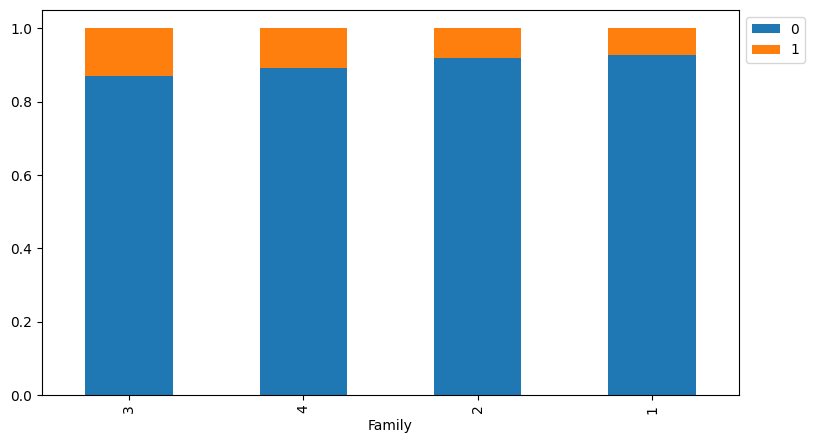

In [41]:
stacked_barplot(data, "Family", "Personal_Loan")

#### Observations:

*   Customers with family size 3 are most likely to accept a personal loan



#### Personal Loan Vs Securities Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


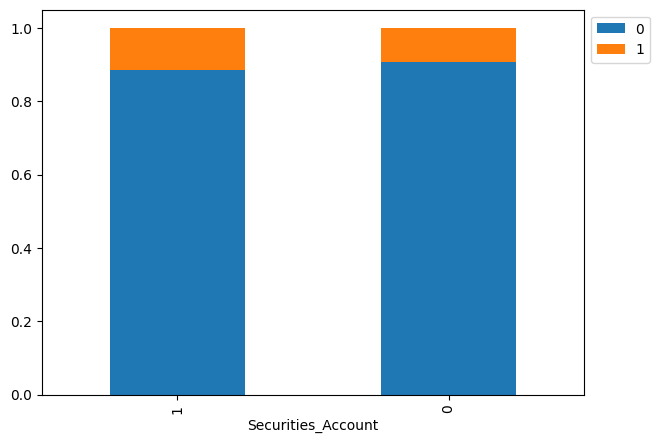

In [42]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

#### Observations:


*   Customers who do not have a securities acoount are less likely to accept a personal loan



#### Personal Loan Vs CD Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


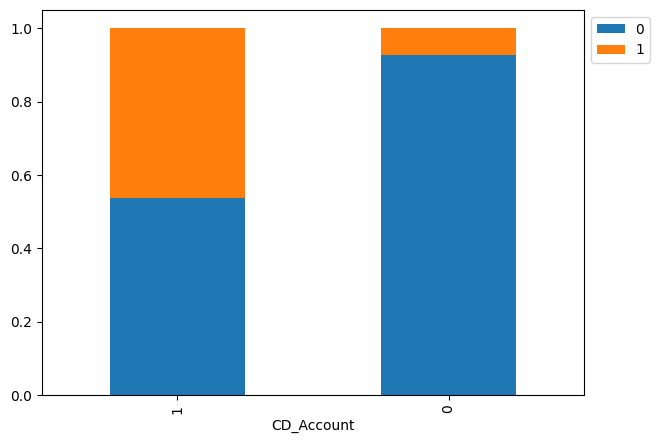

In [43]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

#### Observations:


*   Customers who have CD accounts have purchased more personal loans than those who do not have CD accounts



#### Personal Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


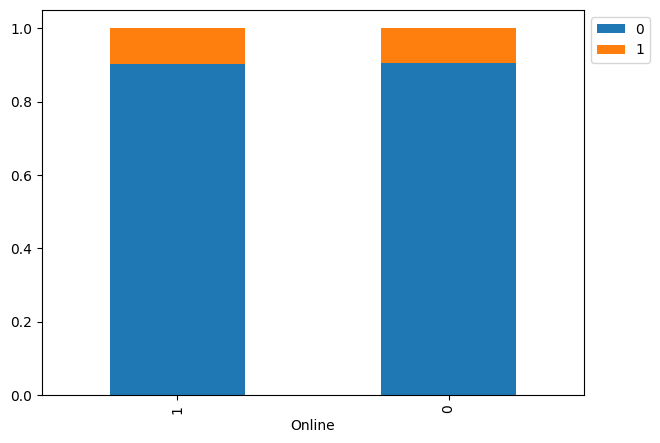

In [44]:
stacked_barplot(data, "Online", "Personal_Loan")

#### Observations:


*   Customers who do not use internet banking have bought less personal loans



#### Personal Loan vs Credit Cards

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


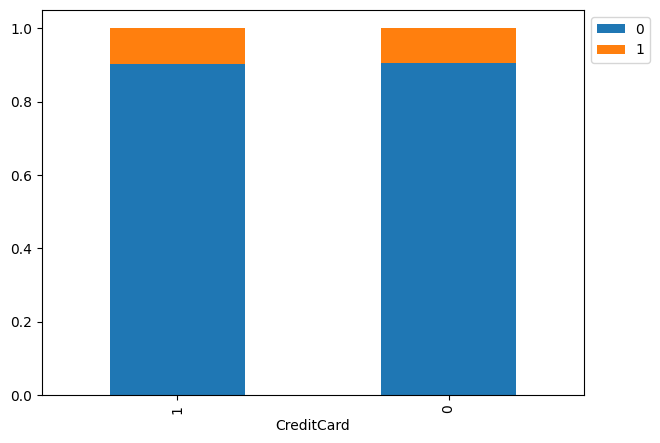

In [45]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

#### Observations:


*   Customers who do not have credit cards from other banks have not perchased personal loan



#### Personal Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


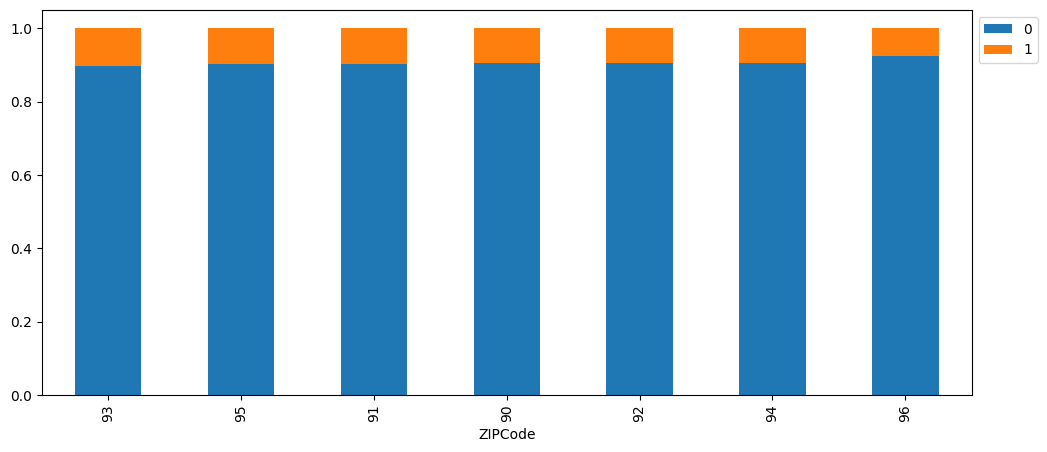

In [46]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

#### Observations:

*   Customers from the zip code starting with 94 have bought more personal loans than from any other zip codes
*   Customers from zip code 96 have bought the least number of personal loans

#### Personal Loan vs Age

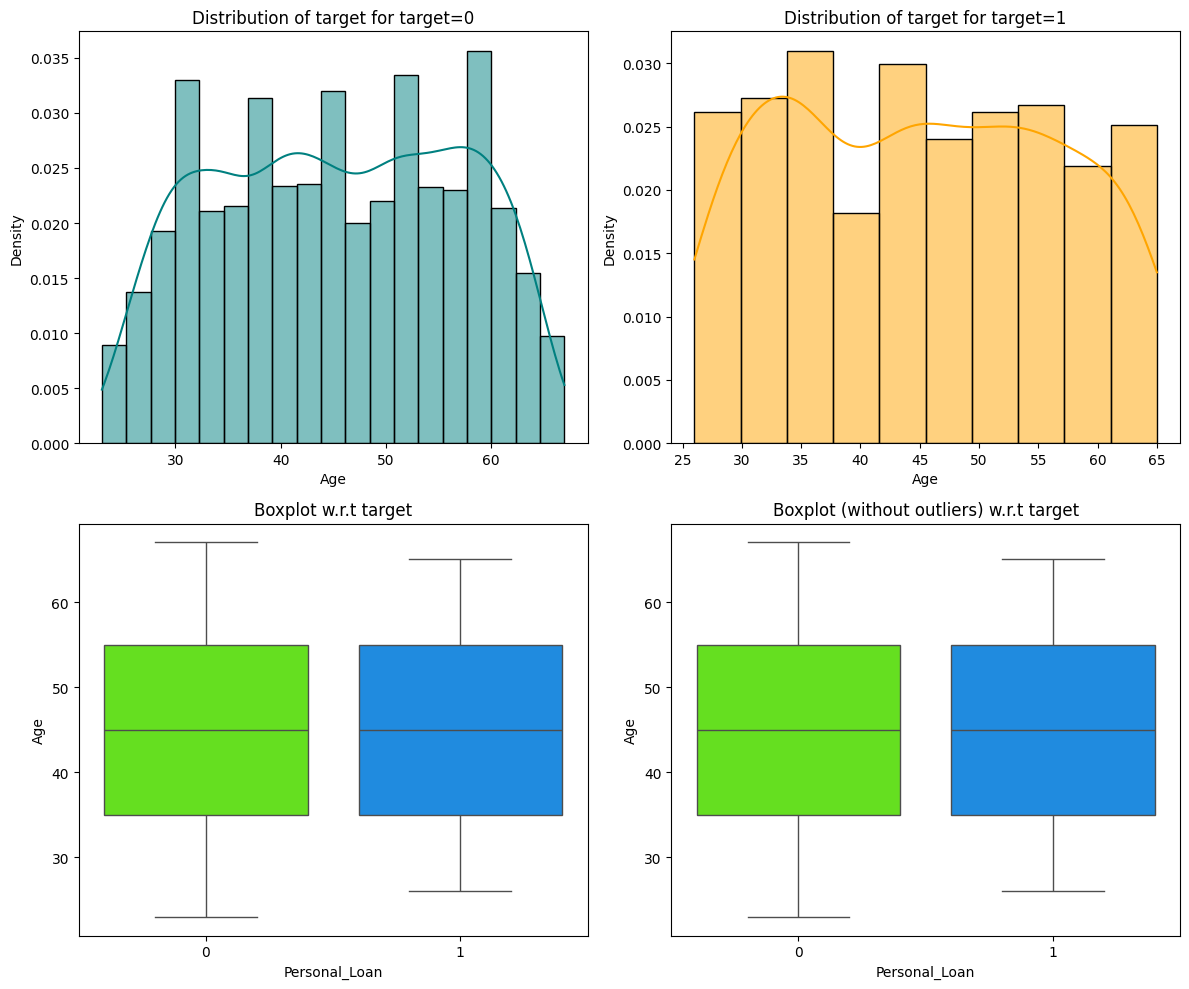

In [47]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

#### Observations:

*   Customers have a mean age of 45 who have accepted as well as not accepted the personal loan



#### Personal Loan vs Experience

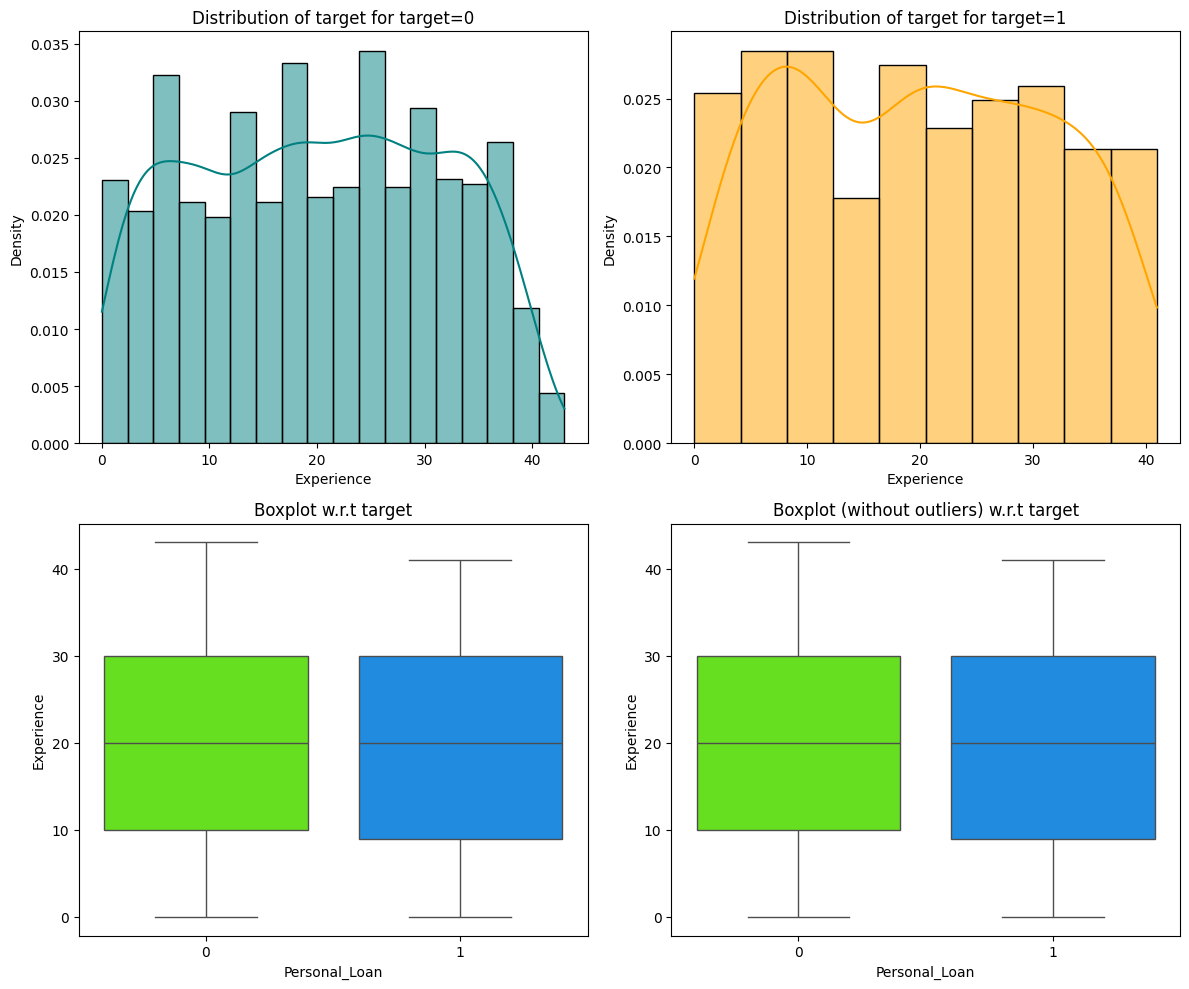

In [48]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

#### Observations:


*   Customers between the experience 4 to 12 years are among the highest loan buyers
*   Customers with experience more than 40 years are among the least buyers of personal loans



Personal Loan vs Income

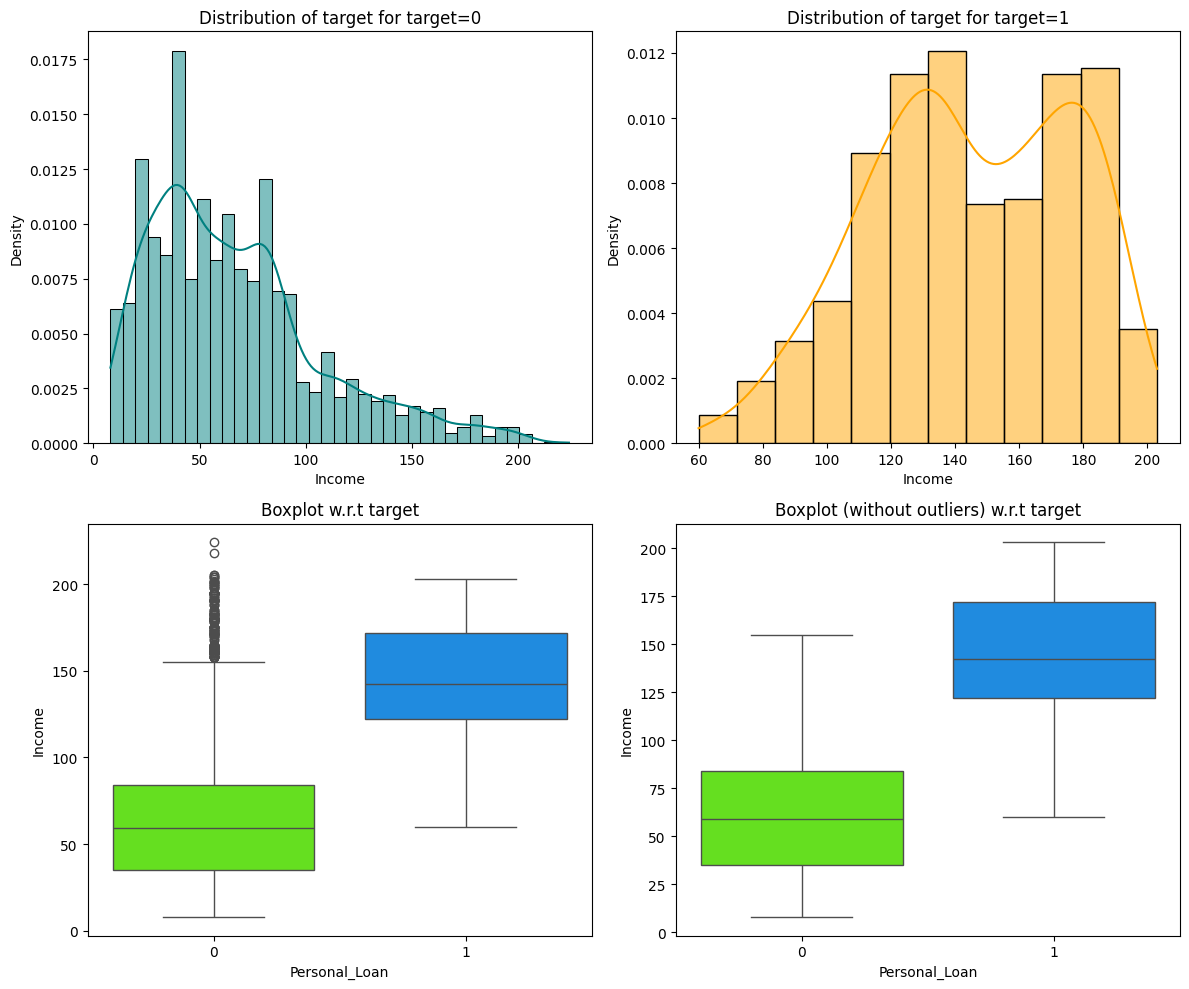

In [49]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

#### Observations:


*   Customers with the income range between 120 k and 180k are the ones who accepted more personal loans than others
*   Income of Customers who did not purchase Personal loans is right skewed



#### Personal Loan vs CC Avg

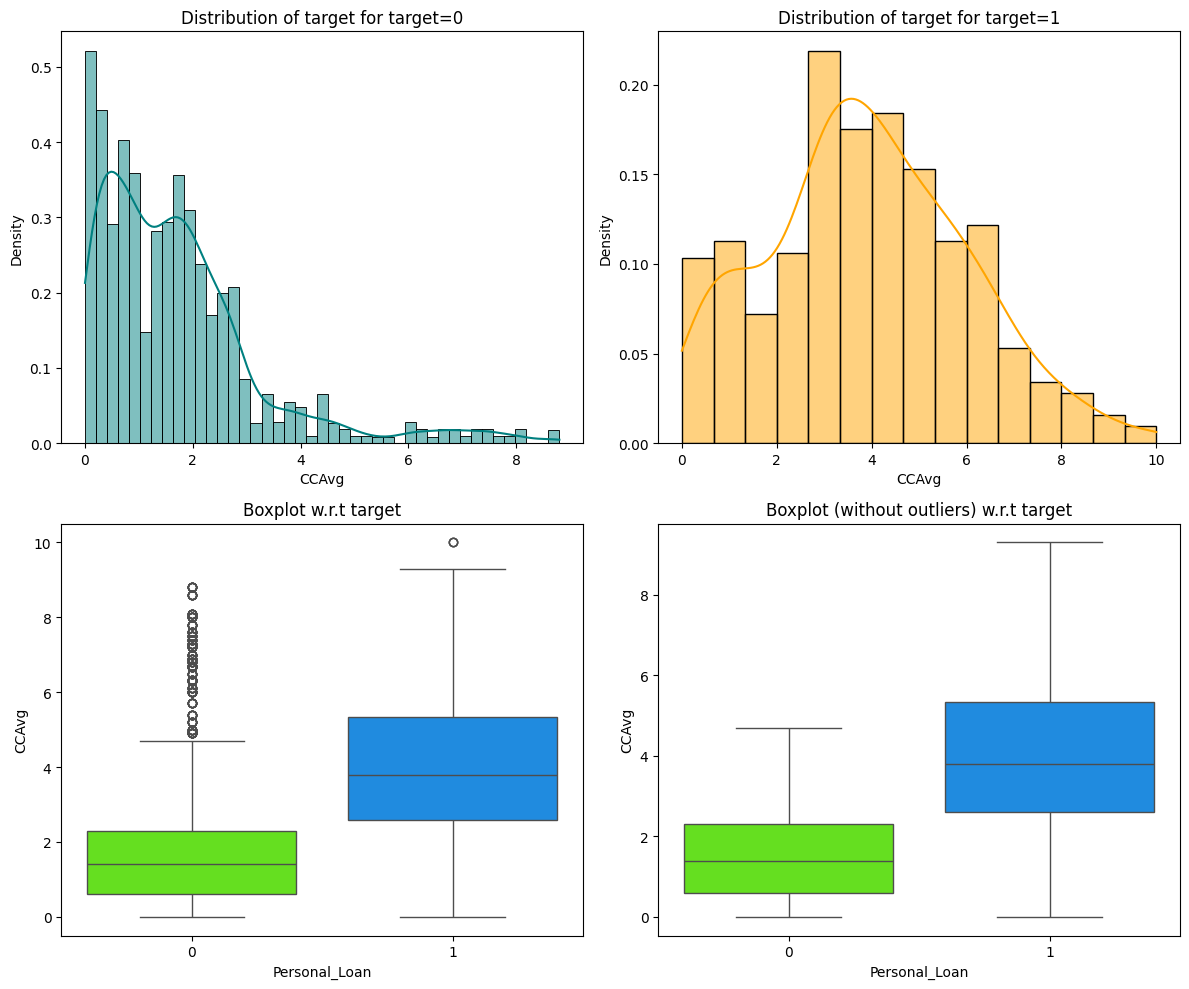

In [50]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

#### Observations:


*   Customers with low CCAvg did not purchase personal loans
*   Customers with high CCAvg accepted the loans



## Data Preprocessing (Contd.)

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Data Preparation for Modeling

In [51]:
# defining the explanatory (independent) and response (dependent) variable
# dropping Experience as it is highly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis = 1)
y = data["Personal_Loan"]

In [52]:
# creating dummy variables
X = pd.get_dummies(X, columns = ["ZIPCode", "Education"], drop_first = True)

X = X.astype(float)

X.head()

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_2,Education_3
0,25.0,49.0,4.0,1.6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.0,34.0,3.0,1.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,35.0,100.0,1.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,35.0,45.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
# splitting the data in train and test sets in the 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [54]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (3500, 17)
Shape of test set: (1500, 17) 

Percentage of classes in training set:
Personal_Loan
0    90.542857
1     9.457143
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.066667
1     9.933333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

Model Evaluation Criteria are a set of metrics and standards used to assess the performance and effectiveness of a model. They help determine the model's accuracy, reliability and efficiency in predicting outcomes or making decisions.

Types of Model Evaluation Criteria


*   Accuracy : How often the model's prediction matches the actual values
*   Precision : Measures the ratio of correctly predicted positive observations to the total number of predicted positive observations
*   Recall : Measures the ratio of correctly predicted positive observations to the total number of actual positive observations
*   F1-score : A balanced metric that considers both precision and recall




### Model Building

#### Functions for different metrics and confusion matrix

In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [56]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2) # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

#### Decision Tree (sklearn default)

In [57]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Checking model performance on training data

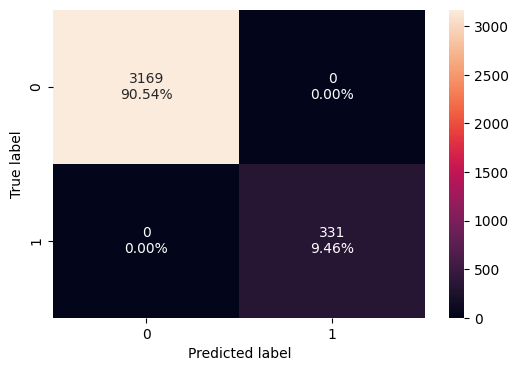

In [58]:
# create a confusion matrix on training data
confusion_matrix_sklearn(dtree1, X_train, y_train)

In [105]:
decision_tree1_perf_train = model_performance_classification_sklearn(
    dtree1, X_train, y_train
)
decision_tree1_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test data

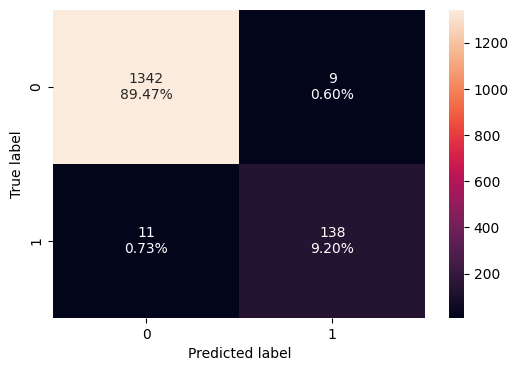

In [104]:
# create a confusion matrix on test data
confusion_matrix_sklearn(dtree1, X_test, y_test)

In [103]:
decision_tree1_perf_test = model_performance_classification_sklearn(
    dtree1, X_test, y_test
)
decision_tree1_perf_test

,Accuracy,Recall,Precision,F1
0,0.986667,0.926174,0.938776,0.932432


#### Visualizing the Decision Tree

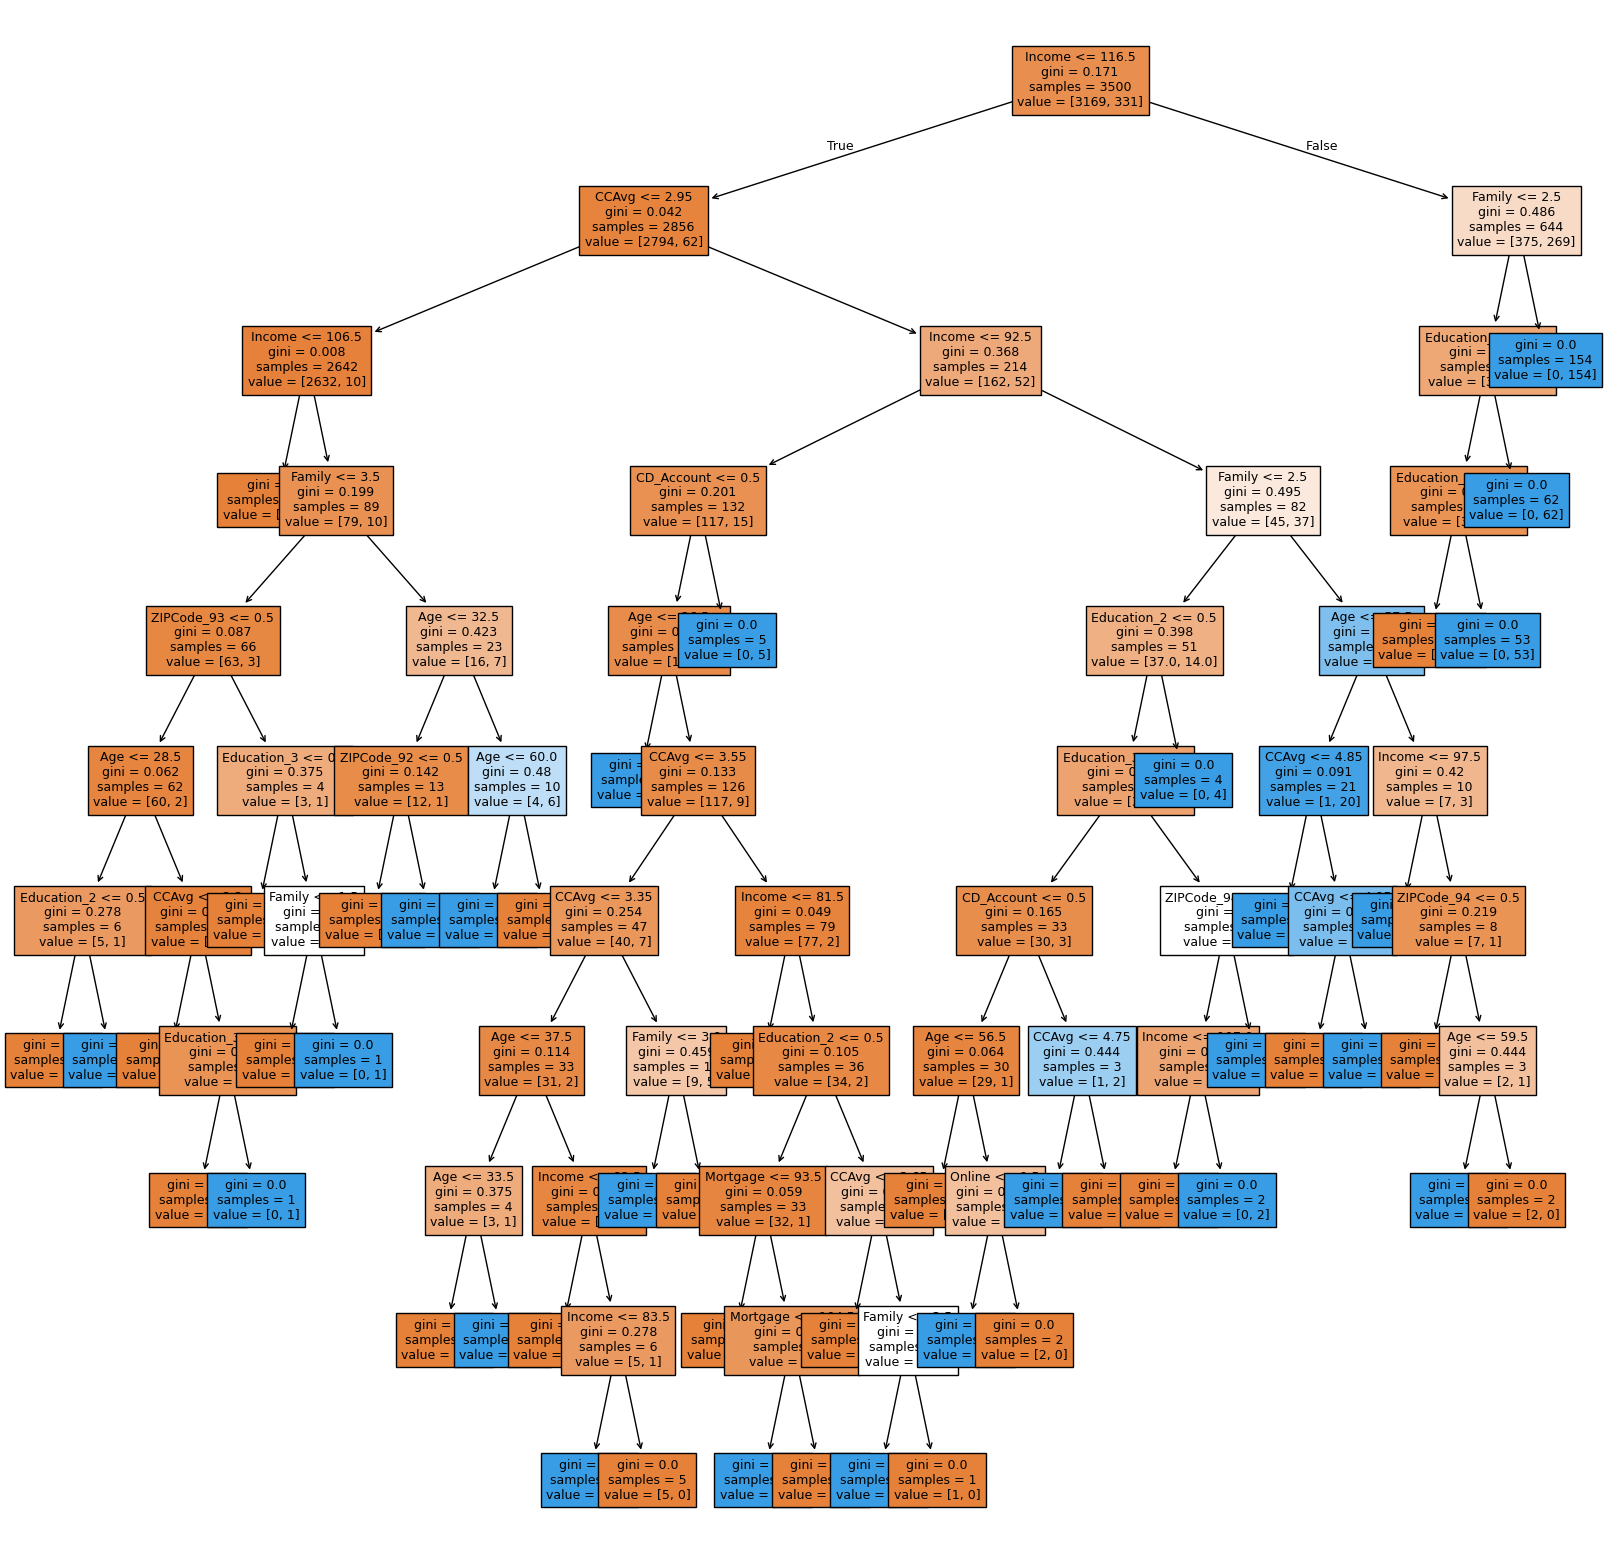

In [62]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

#### Observations:

*   We can see that this is a very complex tree



In [63]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Education_3 

In [64]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.310517
Family              0.260924
Education_2         0.166192
Education_3         0.147961
CCAvg               0.048499
Age                 0.032316
CD_Account          0.017273
ZIPCode_94          0.007183
Mortgage            0.003236
ZIPCode_92          0.003080
Online              0.002224
ZIPCode_93          0.000594
Securities_Account  0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


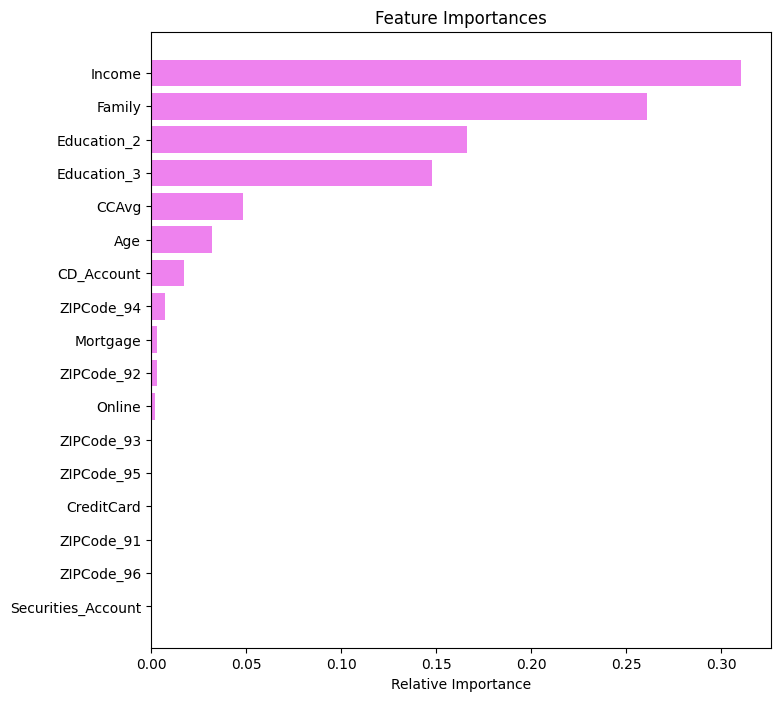

In [65]:
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Improvement

#### Decision Tree (Pre-pruning)

In [66]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [67]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

#### Checking performance on training data

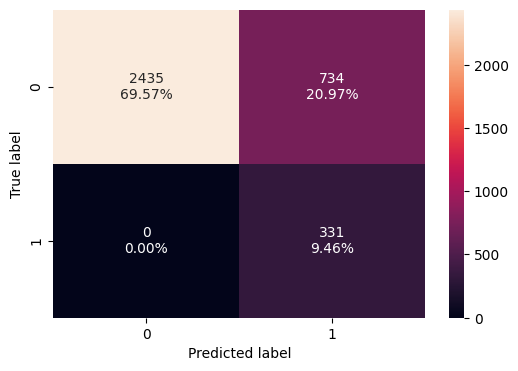

In [68]:
confusion_matrix_sklearn(dtree2, X_train, y_train)

In [106]:
decision_tree2_perf_train = model_performance_classification_sklearn(
    dtree2, X_train, y_train
)
decision_tree2_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


#### Checking performance on test data

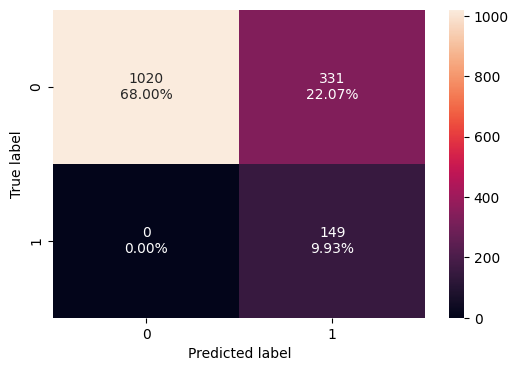

In [70]:
confusion_matrix_sklearn(dtree2, X_test, y_test)

In [100]:
decision_tree2_perf_test = model_performance_classification_sklearn(
    dtree2, X_test, y_test
)
decision_tree2_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


#### Observations:

*   The training and test scores are very close to each other, indicating a generalized performance



#### Visualizing the Decision Tree

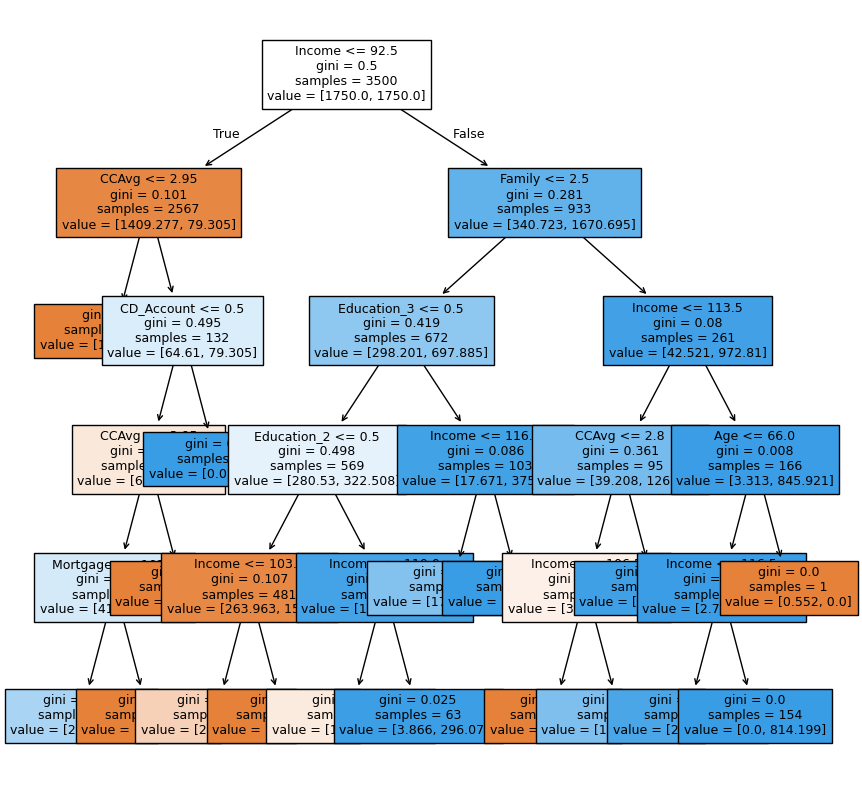

In [72]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()



*   This is much less complex tree than the previous one
*   We can observe the decision rules more clearly



In [73]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- weights: [29.82, 52.87] class: 1
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   |   |--- weights: [11.60, 0.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- weights: [24.85, 15.86] class: 0
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- weights: [12.70, 10.57] class: 0
|   |   |   |   |--- In

In [74]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.677491
Education_2         0.147373
CCAvg               0.068211
Education_3         0.051889
Family              0.041165
CD_Account          0.008060
Mortgage            0.005134
Age                 0.000677
Securities_Account  0.000000
CreditCard          0.000000
Online              0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


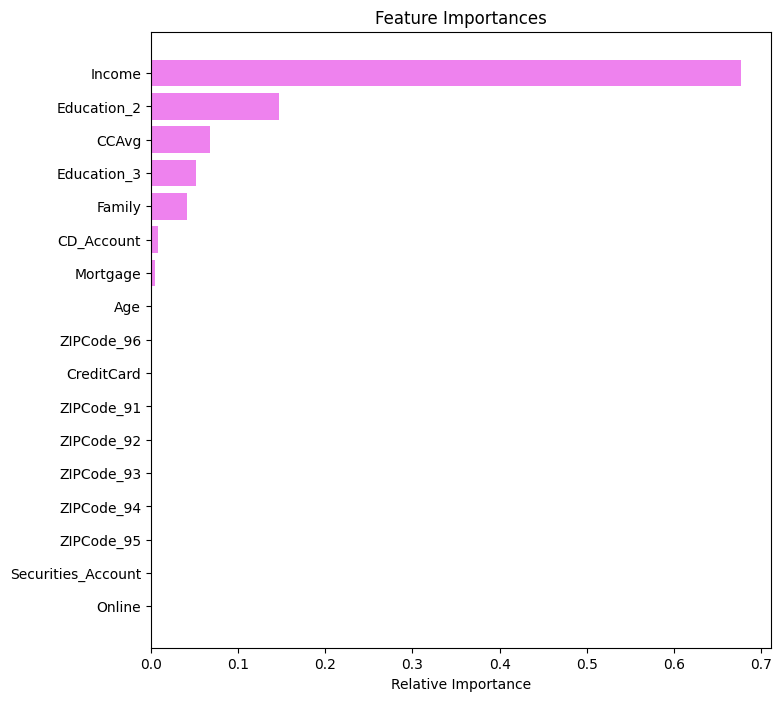

In [75]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Decision Tree (Post-pruning)

In [76]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [77]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.759588e-16
1,3.853725e-19,-7.755734e-16
2,4.729571e-19,-7.751004e-16
3,5.255079e-19,-7.745749e-16
4,5.255079e-19,-7.740494e-16
5,7.707449e-19,-7.732787e-16
6,1.051016e-18,-7.722277e-16
7,1.576524e-18,-7.706511e-16
8,1.257806e-17,-7.580731e-16
9,1.524700e-04,3.049400e-04


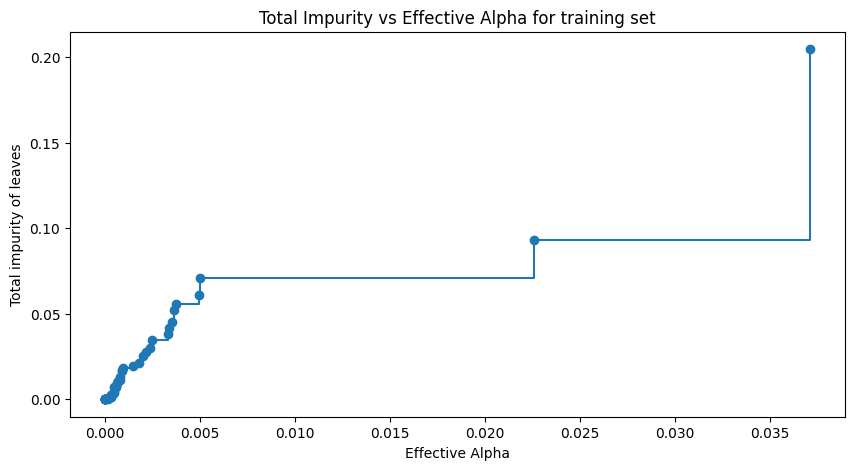

In [78]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");
plt.show()



*   Next, we train a decision tree using the effective alphas
*   The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the corresponding tree with one node



In [79]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=1)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.2953792759992314




*   Next, we remove the last element in clfs and ccp_alphas as it corresponds to a trivial tree with only one node



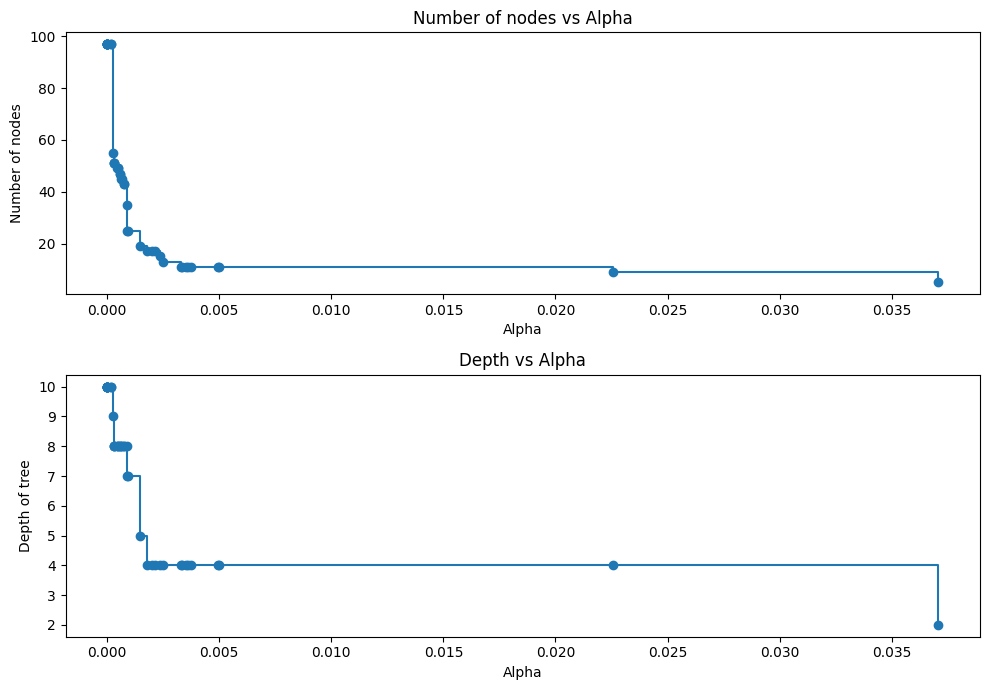

In [80]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

#### Recall vs alpha for training and test sets

In [81]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

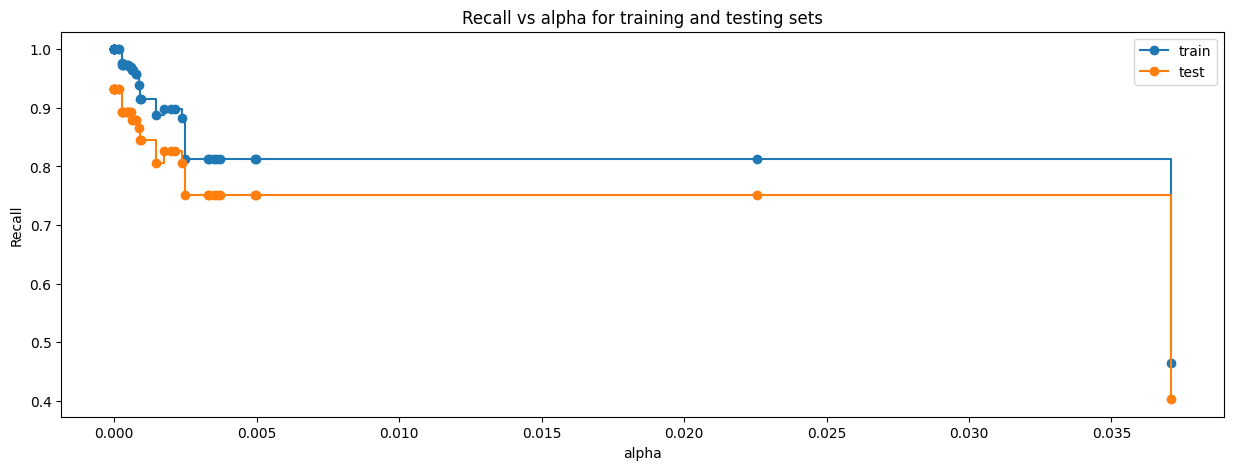

In [82]:
# create a figure
fig, ax = plt.subplots(figsize=(15, 5))

# set the label for x-axis
ax.set_xlabel("alpha")

# set the label for y-axis
ax.set_ylabel("Recall")

# set the title of the plot
ax.set_title("Recall vs alpha for training and testing sets")

# plot the recall for training set, using circles as markers and steps-post style
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")

# plot the recall for test set, using circles as markers and steps-post style
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")

# add legend to the plot
ax.legend()
plt.show()

In [86]:
# creating the model where we get highest test recall score
index_best_model = np.argmax(recall_test)

# selecting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=1)


#### Model Evaluation

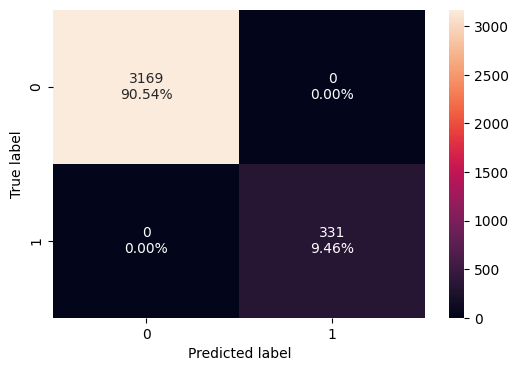

In [87]:
confusion_matrix_sklearn(dtree3, X_train, y_train)

In [109]:
decision_tree3_perf_train = model_performance_classification_sklearn(
    dtree3, X_train, y_train
)
decision_tree3_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


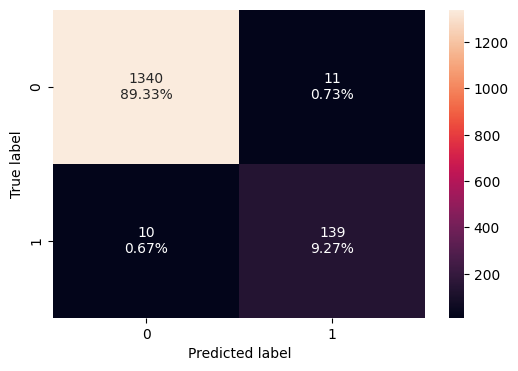

In [89]:
confusion_matrix_sklearn(dtree3, X_test, y_test)

In [108]:
decision_tree3_perf_test = model_performance_classification_sklearn(
    dtree3, X_test, y_test
)
decision_tree3_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766




*   The Recall scores for both training and test sets are close, indicating a generalized performance



#### Visualizing Decision Tree

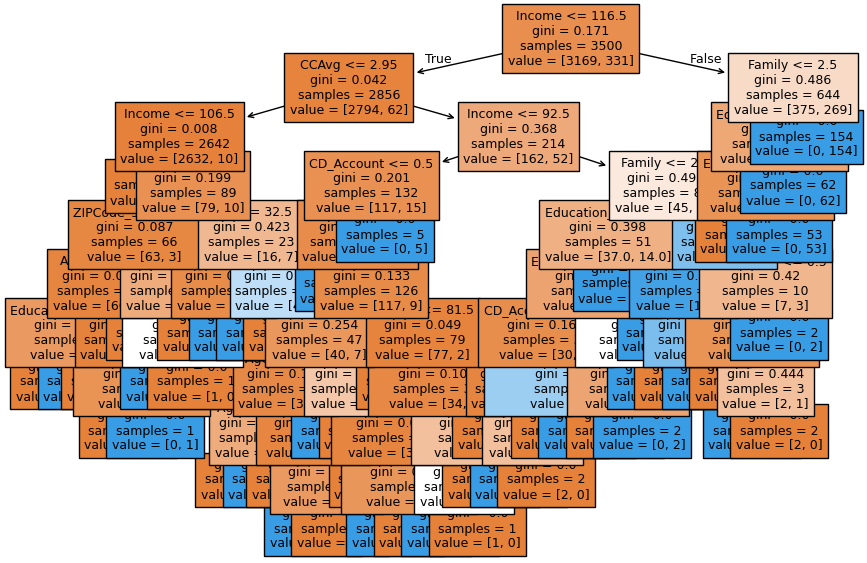

In [91]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [93]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree3, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [94]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree3.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Securities_Account  0.002224
Online              0.002224
ZIPCode_91          0.000556
CreditCard          0.000000
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


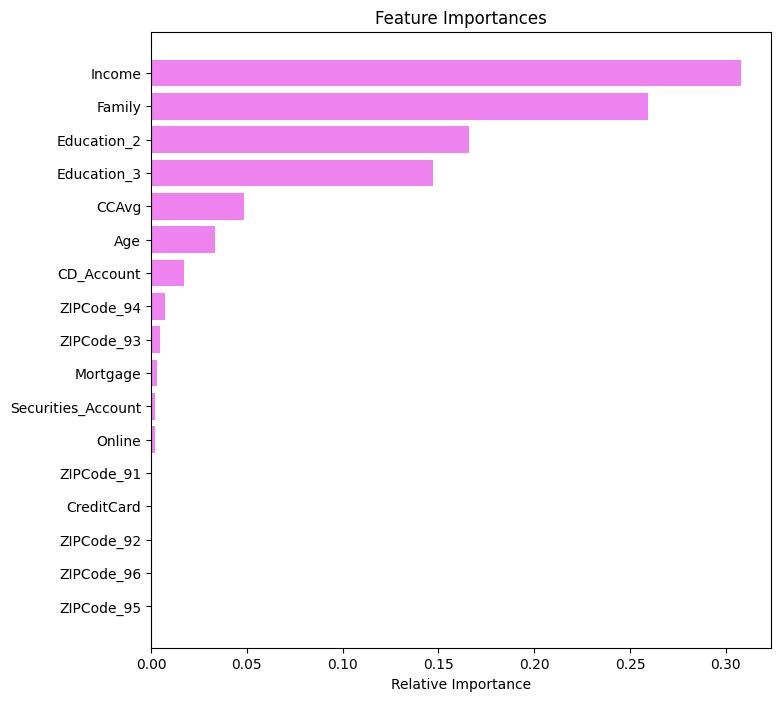

In [96]:
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Final Model Selection

In [111]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree1_perf_train.T,
        decision_tree2_perf_train.T,
        decision_tree3_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790286,1.0
Recall,1.0,1.000000,1.0
Precision,1.0,0.310798,1.0
F1,1.0,0.474212,1.0


In [113]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree1_perf_test.T,
        decision_tree2_perf_test.T,
        decision_tree3_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986667,0.779333,0.986000
Recall,0.926174,1.000000,0.932886
Precision,0.938776,0.310417,0.926667
F1,0.932432,0.473768,0.929766




*   Both the pre-pruned and post-pruned decision trees exhibit generalized performance
*   Pre-pruned decision tree has nearly the same performance on both training and test sets.
*   We will move ahead with the pre-pruned decision tree as our final model



#### Feature Importance

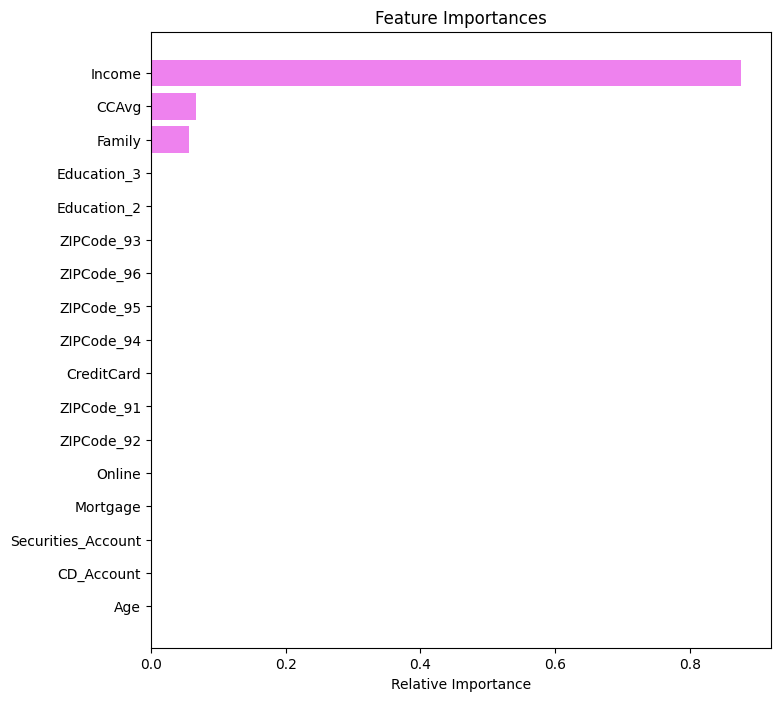

In [114]:
# importance of features in the tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   Annual Income, Average monthly credit card spending and Family are the most influential attributes in determining whether a customer will accept a personal loan or not.



#### Predicting on a single data point

In [127]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:1, :]

# making a prediction
approval_prediction = dtree2.predict(applicant_details)

print(approval_prediction)

[0]
CPU times: user 4.57 ms, sys: 8 µs, total: 4.58 ms
Wall time: 6.9 ms




*   The model was able to predict in under half a second
*   Instead of predicting a class, the model can also predict the liklihood of accepting a personal loan offer or rejecting it.



## Actionable Insights and Business Recommendations


**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

#### Answers:

1.   The mortgage attribute is rightly skewed. There are many outlier for mortgage attribute
2.   Almost 30% of customers have credit cards from other banks
3.   Income, CCAvg and Family have strong correlation with personal loan
4.   Age does not affect the customer's interest in purchasing a loan
5.   Customers with higher education shows more interest in purchasing a personal loan



### Recommendations

*   We have seen Income as the most important feature. Providing promotional offers to this group may enhance the chances of accepting the personal loan offer
*   The bank should also target the group of customers with higher education with offers to increase their chances for accepting the personal loans
*   Customers who spend more on credit cards are also probable candidates to accept personal loans
*   Customers with bigger family size also have more probability of accepting the personal loan



___